# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc

# Read The Data

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploring The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
df[["age" ,"trestbps" , "chol" ,"thalach" , "thal" ] ] =df[["age" ,"trestbps" , "chol" ,"thalach" , "thal"  ]].replace(0 , np.nan)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

In [7]:
df.fillna({"thal":df["thal"].mean()} , inplace=True)


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.age.mode()

0    58
Name: age, dtype: int64

In [10]:
for feature in df:
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None) and df[(df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

age no
sex no
cp no
trestbps no
chol no
fbs no
restecg no
thalach no
exang no
oldpeak no
slope no
ca no
thal no
target no


In [11]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.328904,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.582409,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


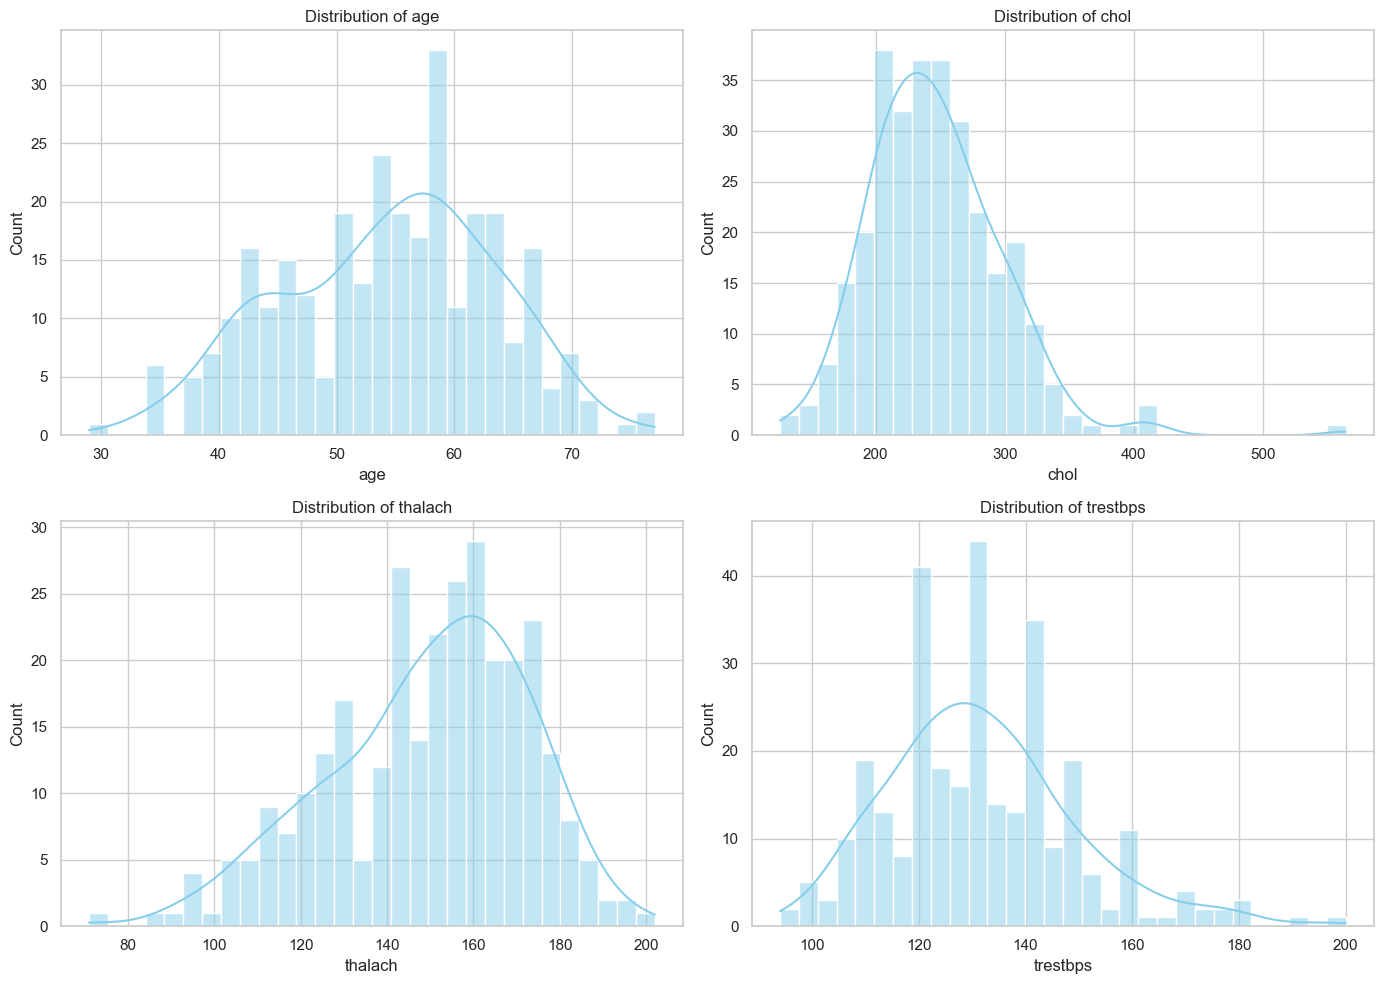

In [13]:
sns.set(style='whitegrid')


cols = ['age', 'chol', 'thalach', 'trestbps']


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  


for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

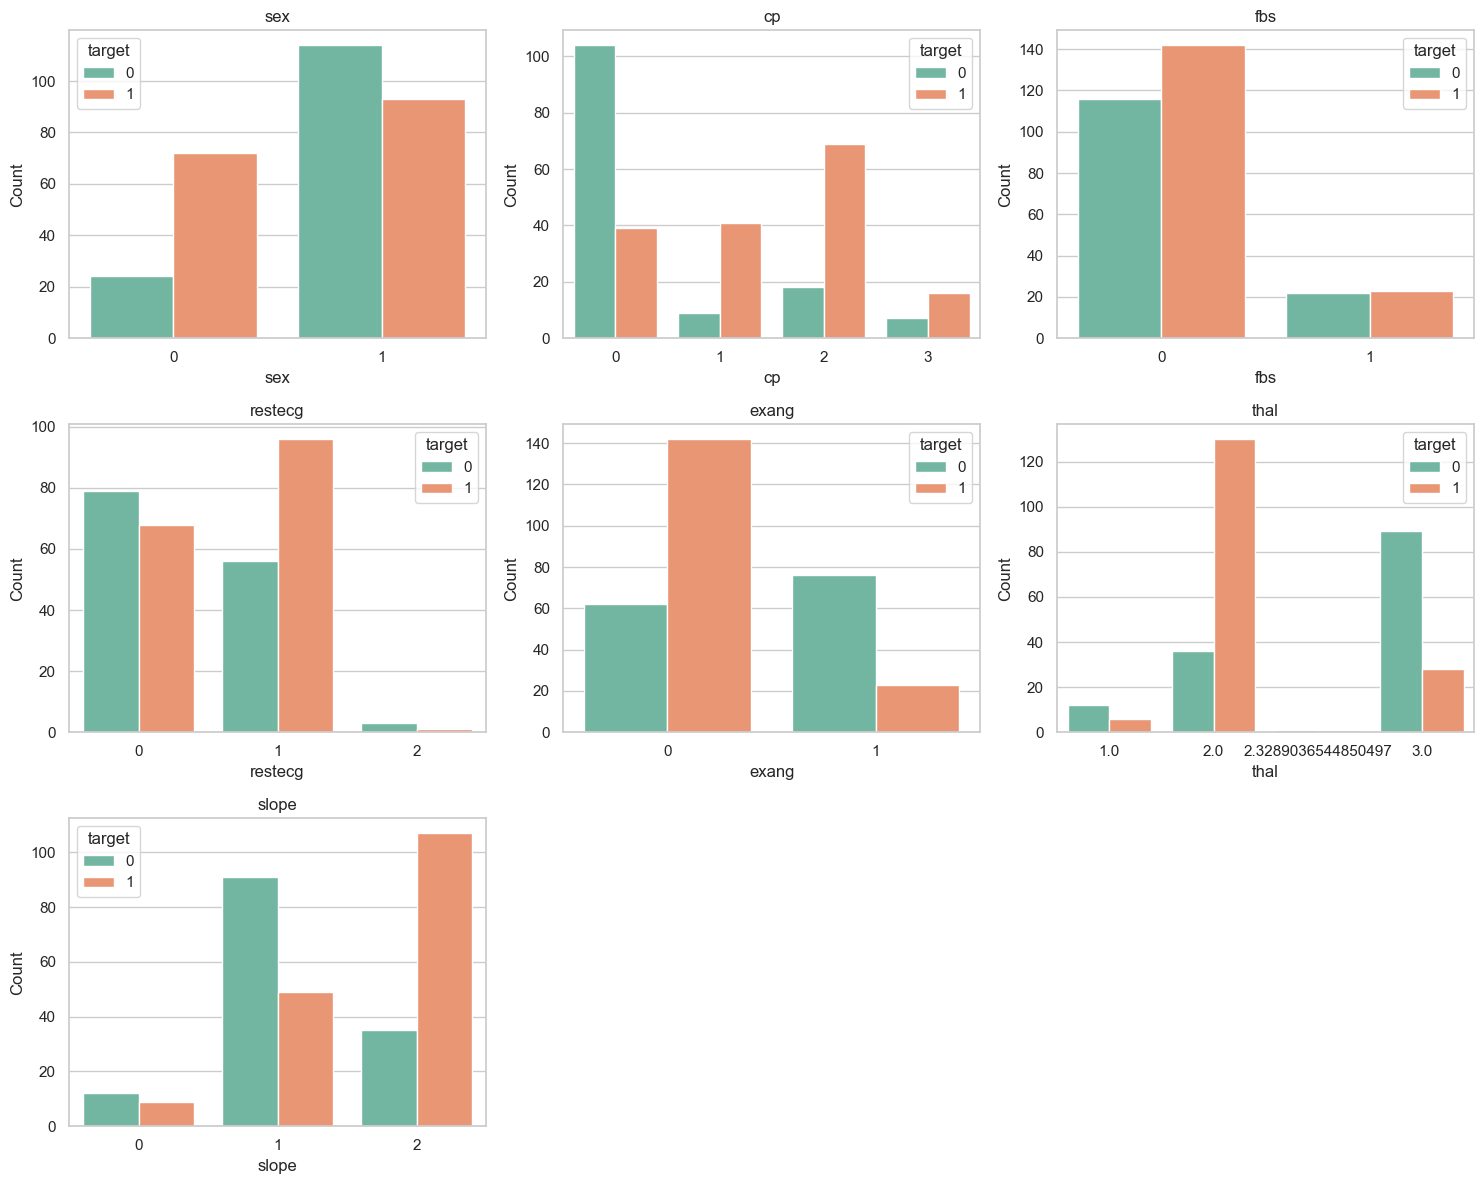

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'slope']


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()


for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Count')


for j in range(len(cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# One Hot Encoding

In [15]:
x= pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)


# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
x[columns_to_scale] = sc.fit_transform(x[columns_to_scale])

# Split the data into training and testing data

In [17]:
from sklearn.model_selection import  train_test_split
X = x.drop(['target' ], axis=1)
y = df.target



In [21]:

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

In [25]:
X_train.shape

(242, 22)

In [27]:
X_test.shape

(61, 22)

<Axes: >

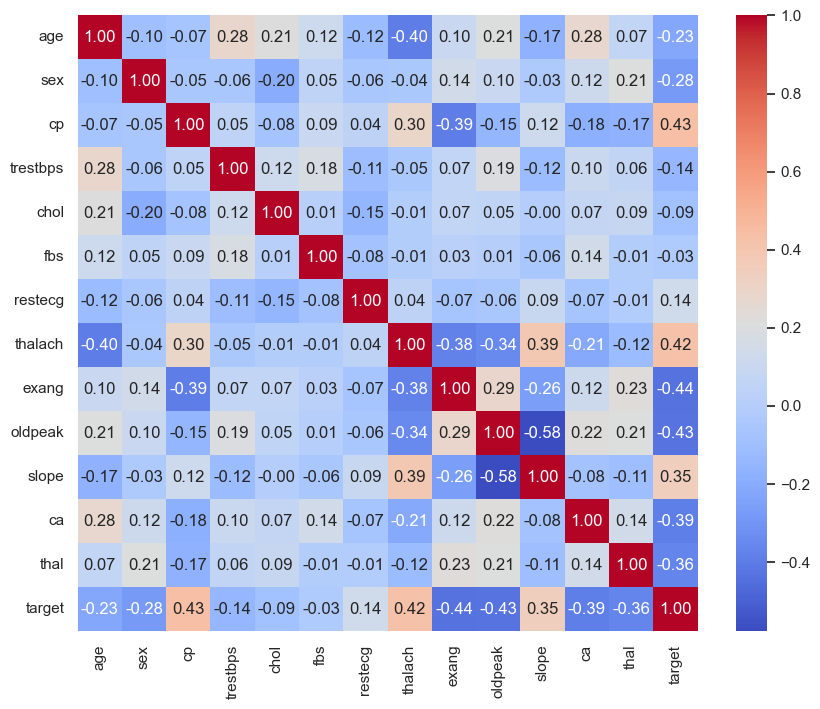

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Modeling

In [51]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

In [53]:

model= LogisticRegression()
kfolds(model, 'Logistic Regression')
train(model, 'Logistic Regression')

Logistic Regression score on cross validation: 85.80645161290322%
Logistic Regression model score on Training data: 86.77685950413223%
Logistic Regression model score on Testing data: 90.1639344262295%


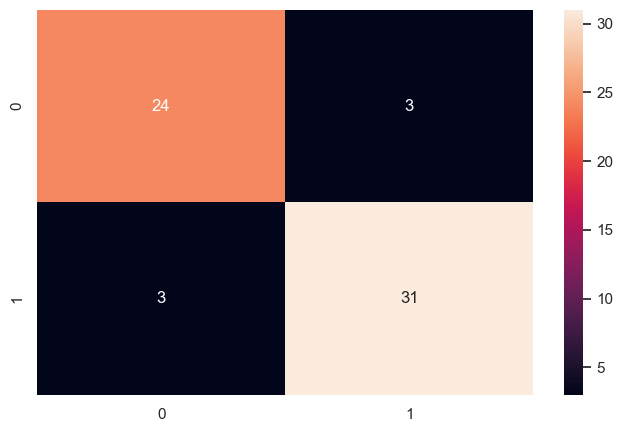

In [55]:
conf_matrix(model)



In [57]:
class_report(model)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



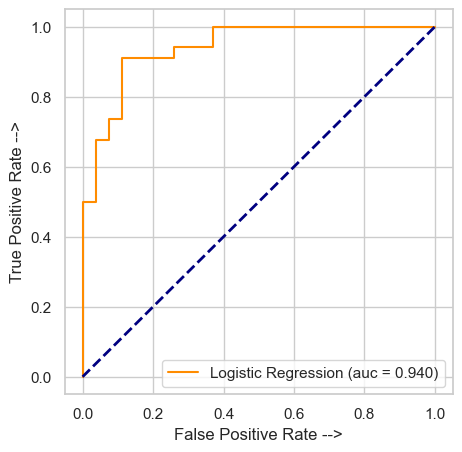

In [59]:

roc(model, "Logistic Regression")